# Visualize LR / Ridge / LASSO Regression

- 任何线性回归算法，都要求模型输入（x）必须是**二维矩阵**，模型输出（y）必须是**一维矩阵**。
- 简单说就是：维度的长度可以为1，但是必须有两个维度。
- **模型输入**所具有的两个维度分别表示”**样本维度**“和”**特征维度**“。
- 其中样本维度的长度就是样本个数，特征维度的长度就是特征的个数。

In [5]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = True
np.random.seed(42)

## 单个特征

- 以拟合简单的一元线性方程 y = 2 x + 3 为例，其特征个数就是1个。
- 为了画图，我们让x取值为一个序列，这个序列的含义就是此特征的样本取值。

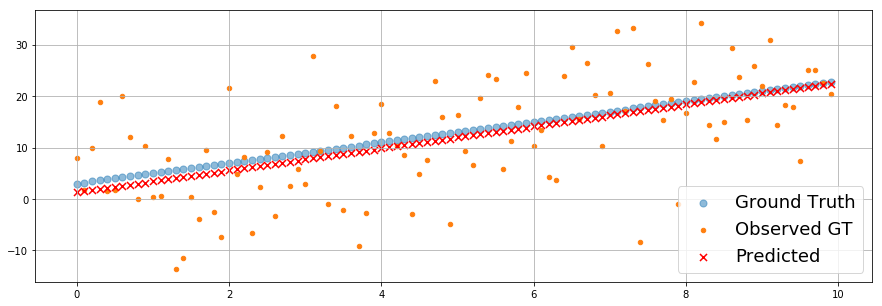

Target Function: y = 2 * x + 3
Predicted Function: y = 2.13932593269 * x + 1.27187145923


In [6]:
x = np.arange(0, 10, 0.1)

y = 2 * x + 3
y_observed = 10 * np.random.randn(*y.shape) + y

# 拟合 x 与 y 之间的关系
reg = LinearRegression(fit_intercept=True)
reg.fit(x.reshape(-1, 1), y_observed)
y_pred = reg.predict(x.reshape(-1, 1))


plt.scatter(x, y, s=50, alpha=0.5, label="Ground Truth")
plt.scatter(x, y_observed, s=20, label="Observed GT")
plt.scatter(x, y_pred, color='r', marker="x", s=50, label="Predicted")
plt.legend(fontsize=18)
plt.show()
print "Target Function: y = 2 * x + 3"
print "Predicted Function: y = {} * x + {}".format(reg.coef_[0], reg.intercept_)

## 多个特征

- 如果我们拟合的是一个复杂的函数，这里以正弦函数为例。由于正弦函数是可以泰勒展开为多个幂函数的累加。
- 下面的实验中，x 是原始自变量，由于三角函数的级数展开都是幂函数，我们将 x的各个幂函数视为不同的特征，共同用于预测。

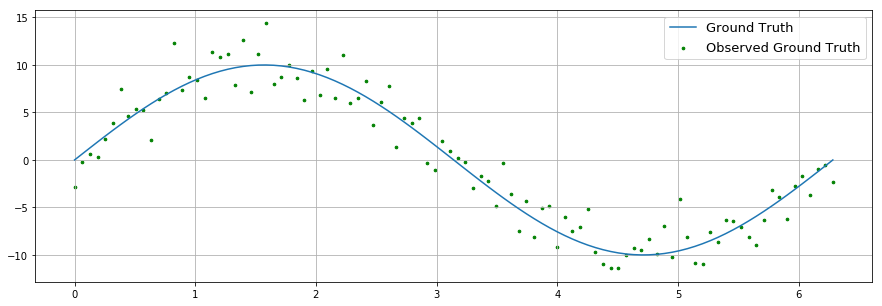

In [7]:
n_sample = 100

# Raw Arguments
x =  np.linspace(0, 2 * np.pi, n_sample)
y = 10 * np.sin(np.array(x))
y_observed = y + 2 * np.random.randn(n_sample)

plt.plot(x, y, label='Ground Truth')
plt.scatter(x, y_observed, s=7, color='g', label="Observed Ground Truth")
plt.legend(fontsize=13)
plt.show()

### 特征太少时的拟合效果

在只有三个特征（x, x^2）的时候，可以看到拟合的效果并不好。R2 Score 较低。

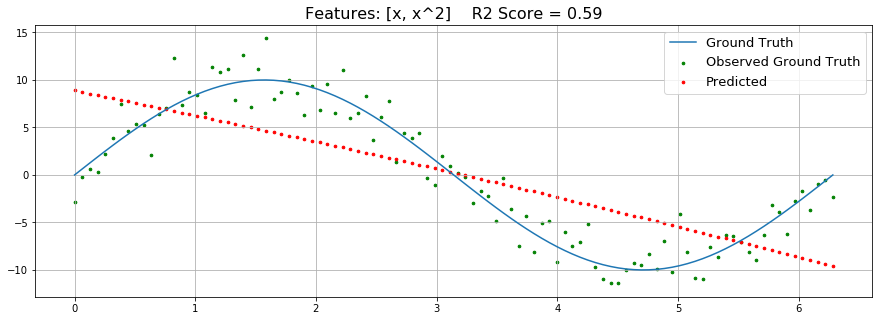

In [8]:
# 特征较少时
data = np.array([x, x**2])
data = np.transpose(data, axes=(1,0))
reg = LinearRegression(fit_intercept=True)
reg.fit(data, y_observed)
y_pred = reg.predict(data)

plt.plot(x, y, label='Ground Truth')
plt.scatter(x, y_observed, s=7, color='g', label="Observed Ground Truth")
plt.scatter(x, y_pred, s=7, color='r', label='Predicted')
plt.title("Features: [x, x^2]    R2 Score = {:.2f}".format(reg.score(data, y)), size=16)
plt.legend(fontsize=13)
plt.show()

### 特征足够多时的拟合效果

- 当特征数量已经从三个达到八个的时候，可以看到拟合效果已经非常好了，R2 Score 几乎满分。

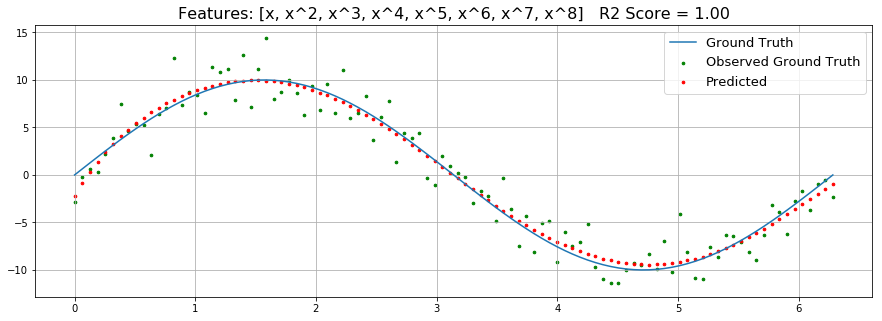

In [9]:
data = np.array([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8])
data = np.transpose(data, axes=(1,0))
reg = LinearRegression(fit_intercept=True)
reg.fit(data, y_observed)
y_pred = reg.predict(data)

plt.plot(x, y, label='Ground Truth')
plt.scatter(x, y_observed, s=7, color='g', label="Observed Ground Truth")
plt.scatter(x, y_pred, s=7, color='r', label='Predicted')
plt.title("Features: [x, x^2, x^3, x^4, x^5, x^6, x^7, x^8]   R2 Score = {:.2f}".format(reg.score(data, y)), size=16)
plt.legend(fontsize=13)
plt.show()

### 特征过多时的拟合效果

- 当特征数量激增到150个的时候，可以看到 y_pred 的点已经向 y_observed 强行拟合，与原本光滑的 y 正弦曲线差别过大。模型严重过拟合。

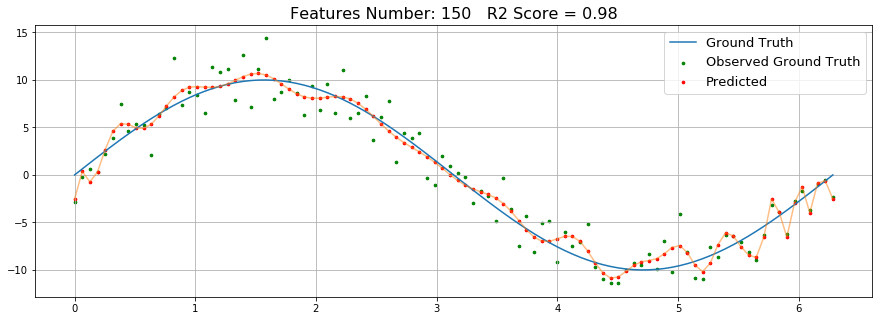

In [10]:
data = np.array([x ** i for i in range(1, 150)])
data = np.transpose(data, axes=(1,0))
reg = LinearRegression(normalize=True, fit_intercept=True)
reg.fit(data, y_observed)
y_pred = reg.predict(data)

plt.plot(x, y, label='Ground Truth')
plt.scatter(x, y_observed, s=7, color='g', label="Observed Ground Truth")
plt.scatter(x, y_pred, s=7, color='r', label='Predicted')
plt.plot(x, y_pred, alpha=0.5)
plt.title("Features Number: 150   R2 Score = {:.2f}".format(reg.score(data, y)), size=16)
plt.legend(fontsize=13)
plt.show()

### 使用 Ridge 抑制过拟合

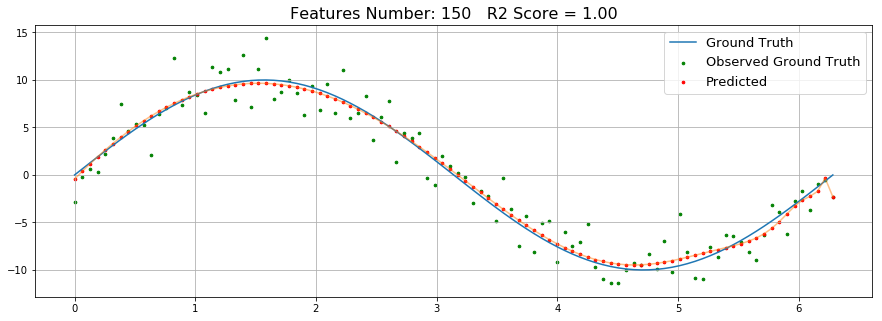

In [11]:
data = np.array([x ** i for i in range(1, 150)])
data = np.transpose(data, axes=(1,0))
reg = Ridge(alpha=0.0001, normalize=True, fit_intercept=True)
reg.fit(data, y_observed)
y_pred = reg.predict(data)

plt.plot(x, y, label='Ground Truth')
plt.scatter(x, y_observed, s=7, color='g', label="Observed Ground Truth")
plt.scatter(x, y_pred, s=7, color='r', label='Predicted')
plt.plot(x, y_pred, alpha=0.5)
plt.title("Features Number: 150   R2 Score = {:.2f}".format(reg.score(data, y)), size=16)
plt.legend(fontsize=13)
plt.show()

### 特征中存在很多无关特征时的拟合效果

- 当输入特征中绝大多数都是无关特征时，例如下面的 data 矩阵中，竟然有50个特征都是随机特征，这导致模型的预测严重过拟合。

In [12]:
data = np.array([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8])
irrelevent = np.array([np.random.rand(len(x)) for i in range(50)])
data = np.concatenate((data, irrelevent), axis=0)
data = np.transpose(data, axes=(1,0))

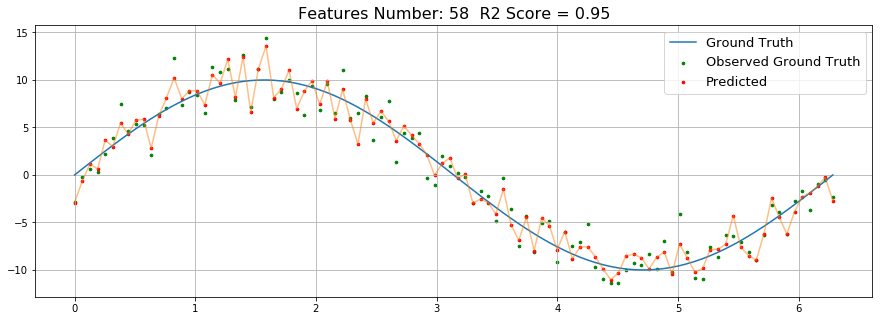

In [13]:
reg = LinearRegression(normalize=True, fit_intercept=True)
reg.fit(data, y_observed)
y_pred = reg.predict(data)

plt.plot(x, y, label='Ground Truth')
plt.scatter(x, y_observed, s=7, color='g', label="Observed Ground Truth")
plt.scatter(x, y_pred, s=7, color='r', label='Predicted')
plt.plot(x, y_pred, alpha=0.5)
plt.title("Features Number: {}  R2 Score = {:.2f}".format(data.shape[1], reg.score(data, y)), size=16)
plt.legend(fontsize=13)
plt.show()

### 使用 LASSO 做特征选择，筛掉无关特征

- 使用 Lasso Regression 拟合时，可以通过设置超参数 alpha 来惩罚那些较大的特征。
- alpha 越大，被置零的特征数量越多，直至所有特征都被置零，这是模型预测的是一个常数值。
- 可以通过 `reg.coef_` 访问拟合后模型对各个特征的参数拟合值。
- `sum(reg.coef_ != 0)` 可以计算出当前模型参数中非零的参数个数。这是衡量模型复杂度的一个客观标准。

[-7.77407875e-01 -4.12314809e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.86179132e-06
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -5.00064469e-01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.67408484e-01  4.84111108e-01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.90973135e+00 -0.00000000e+00 -0.00000000e+00
  1.34905976e-01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.38898913e-01 -0.00000000e+00 -2.54907248e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -4.44681654e-02  0.00000000e+00
 -7.50692099e-01  0.00000000e+00]


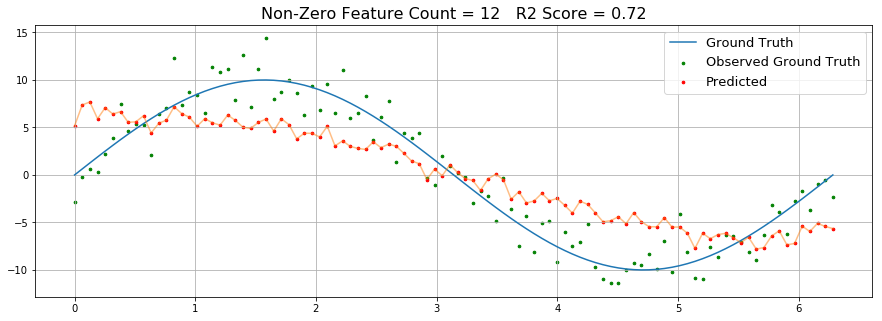

[-2.30167766 -0.01265639 -0.         -0.         -0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.          0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.         -0.          0.
  0.         -0.         -0.          0.         -0.          0.
 -0.          0.80550652 -0.         -0.          0.         -0.
  0.         -0.          0.04286222 -0.         -0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.          0.         -0.26908956  0.        ]


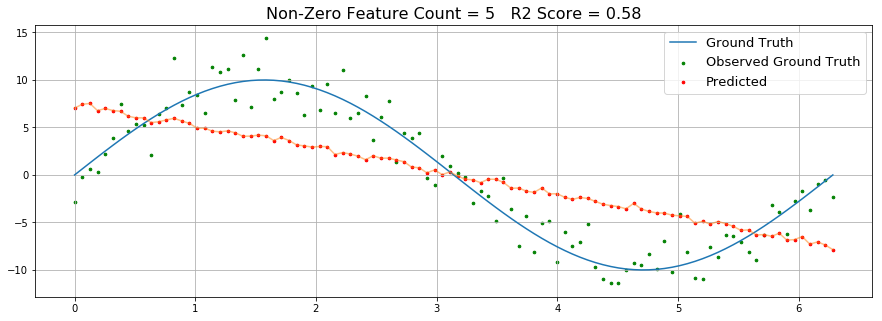

[-0.75886809 -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.          0.         -0.          0.        ]


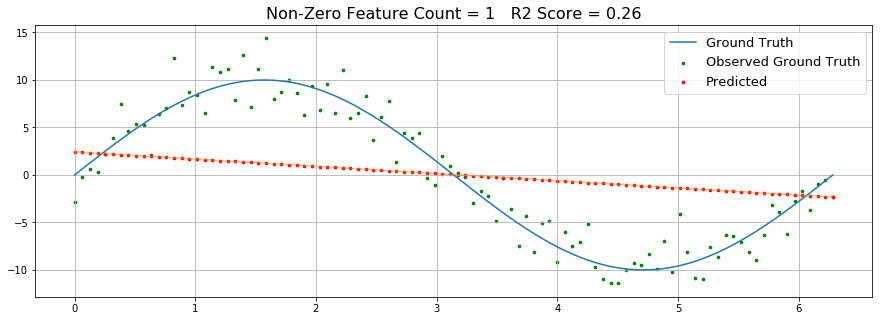

In [16]:
reg = Lasso(alpha=0.06, max_iter=10000, tol=0.00001, normalize=True, fit_intercept=True)
reg.fit(data, y_observed)
y_pred = reg.predict(data)
non_zero_feature = sum(reg.coef_ != 0)
print reg.coef_

plt.plot(x, y, label='Ground Truth')
plt.scatter(x, y_observed, s=7, color='g', label="Observed Ground Truth")
plt.scatter(x, y_pred, s=7, color='r', label='Predicted')
plt.plot(x, y_pred, alpha=0.5)
plt.title("Non-Zero Feature Count = {}   R2 Score = {:.2f}".format(non_zero_feature, reg.score(data, y)), size=16)
plt.legend(fontsize=13)
plt.show()

reg = Lasso(alpha=0.1, max_iter=10000, tol=0.00001, normalize=True, fit_intercept=True)
reg.fit(data, y_observed)
y_pred = reg.predict(data)
non_zero_feature = sum(reg.coef_ != 0)
print reg.coef_

plt.plot(x, y, label='Ground Truth')
plt.scatter(x, y_observed, s=7, color='g', label="Observed Ground Truth")
plt.scatter(x, y_pred, s=7, color='r', label='Predicted')
plt.plot(x, y_pred, alpha=0.5)
plt.title("Non-Zero Feature Count = {}   R2 Score = {:.2f}".format(non_zero_feature, reg.score(data, y)), size=16)
plt.legend(fontsize=13)
plt.show()

reg = Lasso(alpha=0.4, max_iter=10000, tol=0.00001, normalize=True, fit_intercept=True)
reg.fit(data, y_observed)
y_pred = reg.predict(data)
non_zero_feature = sum(reg.coef_ != 0)
print reg.coef_

plt.plot(x, y, label='Ground Truth')
plt.scatter(x, y_observed, s=7, color='g', label="Observed Ground Truth")
plt.scatter(x, y_pred, s=7, color='r', label='Predicted')
plt.plot(x, y_pred, alpha=0.5)
plt.title("Non-Zero Feature Count = {}   R2 Score = {:.2f}".format(non_zero_feature, reg.score(data, y)), size=16)
plt.legend(fontsize=13)
plt.show()